<a href="https://colab.research.google.com/github/v5v5/StepikMLService/blob/main/%D0%9A%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D1%8B_%D0%B0%D0%B2%D0%B8%D0%B0%D0%BA%D0%BE%D0%BC%D0%BF%D0%B0%D0%BD%D0%B8%D0%B8_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [153]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [154]:
df = pd.read_csv("https://raw.githubusercontent.com/evgpat/edu_stepik_from_idea_to_mvp/main/datasets/clients.csv")

In [155]:
# df.sample(3)
df.shape

(129880, 24)

In [156]:
# Определим какие типы колонок присутствуют в таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129549 non-null  object 
 2   Age                                129564 non-null  float64
 3   Customer Type                      129803 non-null  object 
 4   Type of Travel                     129779 non-null  object 
 5   Class                              129764 non-null  object 
 6   Flight Distance                    129786 non-null  float64
 7   Departure Delay in Minutes         129773 non-null  float64
 8   Arrival Delay in Minutes           129371 non-null  float64
 9   Inflight wifi service              129835 non-null  float64
 10  Departure/Arrival time convenient  129831 non-null  float64
 11  Ease of Online booking             1298

Есть признаки категориальные
- Gender
- Customer Type
- Type of Travel
- Class

Есть признаки численные
- Age
- Flight Distance
- Departure Delay in Minutes
- Arrival Delay in Minutes
- Inflight wifi service
- Departure/Arrival time convenient
- Ease of Online booking
- Gate location
- Food and drink
- Online boarding
- Seat comfort
- Inflight entertainment
- On-board service
- Leg room service
- Baggage handling
- Checkin service
- Inflight service
- Cleanliness

Есть целевая категориальная переменная
- satisfaction


In [157]:
# Определим значения категориальных признаков
categorical_features = [
    'Gender',
    'Customer Type',
    'Type of Travel',
    'Class',
    'satisfaction'
]
for f in categorical_features:
    print(f + ":\n" + df[f].value_counts(dropna=False).to_string() + '\n')

Gender:
Female    65726
Male      63823
NaN         331

Customer Type:
Loyal Customer       106040
disloyal Customer     23763
NaN                      77

Type of Travel:
Business travel    89625
Personal Travel    40154
NaN                  101

Class:
Business    62103
Eco         58264
Eco Plus     9397
NaN           116

satisfaction:
neutral or dissatisfied    58879
satisfied                  45025
-                          25976



In [158]:
# Определим значения численных признаков
numeric_features = [
'Age',
'Flight Distance',
'Departure Delay in Minutes',
'Arrival Delay in Minutes',
'Inflight wifi service',
'Departure/Arrival time convenient',
'Ease of Online booking',
'Gate location',
'Food and drink',
'Online boarding',
'Seat comfort',
'Inflight entertainment',
'On-board service',
'Leg room service',
'Baggage handling',
'Checkin service',
'Inflight service',
'Cleanliness'
]
df[numeric_features].describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,129564.000000,129786.000000,129773.000000,129371.000000,129835.000000,129831.000000,129837.000000,129842.000000,129830.000000,129834.000000,129832.000000,129833.000000,129836.000000,129834.000000,129832.000000,129838.000000,129817.00000,129843.000000
mean,40.113951,1323.385804,15.811301,16.651406,2.732183,3.061857,2.760523,2.981424,3.208349,3.256674,3.445691,3.361395,3.387181,3.356101,3.636107,3.310056,3.64718,3.289865
std,20.365190,4516.191530,93.206139,109.167328,1.359786,1.559323,1.430800,1.312628,1.357649,1.381889,1.349732,1.366866,1.335540,1.361633,1.221818,1.298626,1.21837,1.347625
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.00000,2.000000
50%,40.000000,846.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.00000,3.000000
75%,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.00000,4.000000
max,621.000000,379620.000000,22227.000000,14006.000000,45.000000,45.000000,45.000000,36.000000,45.000000,40.000000,45.000000,45.000000,45.000000,40.000000,40.000000,45.000000,40.00000,45.000000


Можно сделать вывод:
- Есть некорректные данные во всех численных признаках
    - Age: максимальное значение невозможно
    - Flight Distance: максимальное значение невозможно, т.к. 379620.0 миль = 610939 км = это 15 длин экватора
    - Departure Delay in Minutes: максимальное значение невозможно, т.к. 22227.0 - это 370 дней
    - Arrival Delay in Minutes: максимальное значение невозможно, т.к. 14006.0 - это 233 дней
- Есть некорректные данные во всех нецелевых оценок, т.к. эти значения должны принимать значения [1..5]
    - Inflight wifi service: 0.0, 45.0
    - Departure/Arrival time convenient: 0.0, 45.0
    - Ease of Online booking: 0.0, 45.0
    - Gate location: 0.0, 36.0
    - Food and drink: 0.0, 45.0
    - Online boarding: 0.0, 40.0
    - Seat comfort: 0.0, 45.0
    - Inflight entertainment: 0.0, 45.0
    - On-board service: 0.0, 45.0
    - Leg room service: 0.0, 40.0
    - Baggage handling: 0.0, 40.0
    - Checkin service: 0.0, 45.0
    - Inflight service: 0.0, 40.0
    - Cleanliness: 0.0, 45.0

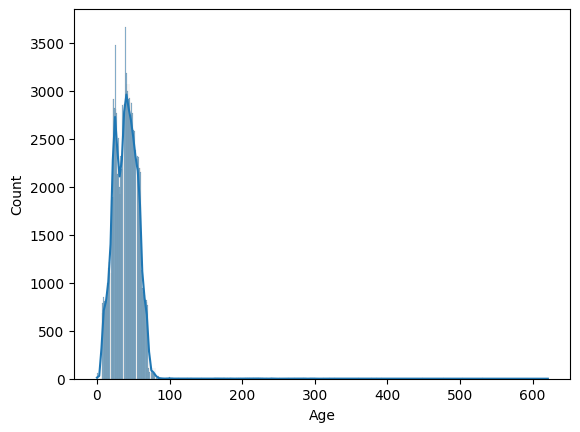

112.62200000000303

In [159]:
# Определим количество некорректных признаков
# - Age: определим подбором 0.3 перцентиль - выбросы
sns.histplot(df['Age'], kde=True)
plt.show()

age_ok = df['Age'].quantile(0.997)
age_ok

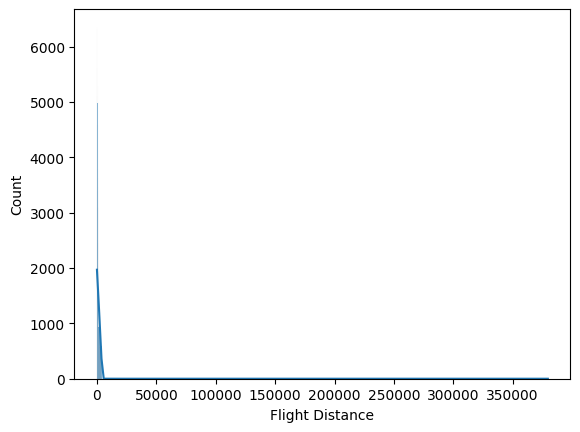

3993.0

In [160]:
# - Flight Distance: определим подбором 0.3 перцентиль - выбросы
sns.histplot(df['Flight Distance'], kde=True)
plt.show()

distance_ok = df['Flight Distance'].quantile(0.997)
distance_ok

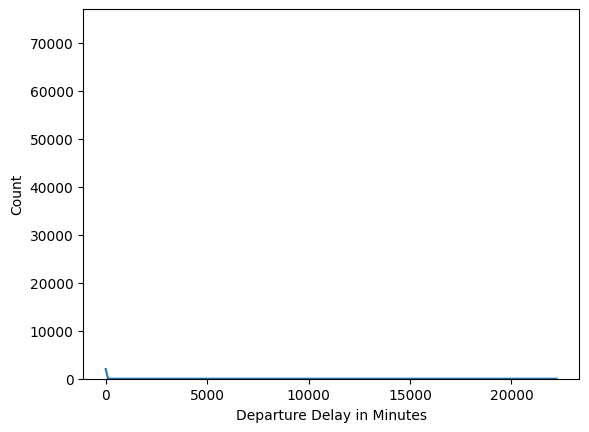

294.0

In [161]:
# - Departure Delay in Minutes: определим подбором 0.3 перцентиль - выбросы
sns.histplot(df['Departure Delay in Minutes'], kde=True)
plt.show()

departue_delay_ok = df['Departure Delay in Minutes'].quantile(0.997)
departue_delay_ok

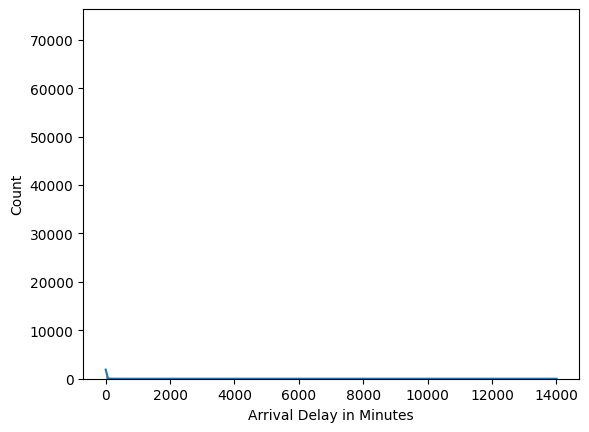

296.0

In [162]:
# - Arrival Delay in Minutes: определим подбором 0.3 перцентиль - выбросы
sns.histplot(df['Arrival Delay in Minutes'], kde=True)
plt.show()

arrival_delay_ok = df['Arrival Delay in Minutes'].quantile(0.997)
arrival_delay_ok

In [163]:
# Определим количество некорректных нецелевых оценок
params_score = [
'Inflight wifi service',
'Departure/Arrival time convenient',
'Ease of Online booking',
'Gate location',
'Food and drink',
'Online boarding',
'Seat comfort',
'Inflight entertainment',
'On-board service',
'Leg room service',
'Baggage handling',
'Checkin service',
'Inflight service',
'Cleanliness'
]
for p in params_score:
  print(len(df[(df[p] < 1) | (df[p] > 5)])/len(df)*100)

3.0428087465352633
5.177856482907299
4.398675700646751
0.03387742531567601
0.13089005235602094
2.4006775485063137
0.037727132737911916
0.037727132737911916
0.028487834924545735
0.4958423159839852
0.02694795195565137
0.03387742531567601
0.037727132737911916
0.036957191253464736


Во всех категориях нецелевых оценок количество значений вне диапазона [1..5] меньше 5%, поэтому их можно отбросить

In [164]:
# Анализ целевых оценок
df[['satisfaction']].value_counts(dropna=False, normalize=True)

satisfaction           
neutral or dissatisfied    0.453334
satisfied                  0.346666
-                          0.200000
dtype: float64

Категорию '-' невозможно интерпретировать, поэтому эти строки можно отбросить

Отбросим все некорректные значения

In [165]:
df.drop(df[df['Age'] > age_ok].index, inplace=True)
df.drop(df[df['Flight Distance'] > distance_ok].index, inplace=True)
df.drop(df[df['Departure Delay in Minutes'] > departue_delay_ok].index, inplace=True)
df.drop(df[df['Arrival Delay in Minutes'] > arrival_delay_ok].index, inplace=True)

In [166]:
params_score = [
'Inflight wifi service',
'Departure/Arrival time convenient',
'Ease of Online booking',
'Gate location',
'Food and drink',
'Online boarding',
'Seat comfort',
'Inflight entertainment',
'On-board service',
'Leg room service',
'Baggage handling',
'Checkin service',
'Inflight service',
'Cleanliness'
]
for p in params_score:
  df = df[(df[p] >= 1) & (df[p] <= 5)]

In [167]:
# Проверим, что значения вне диапазона [1..5] отброшены
df['Inflight wifi service'].value_counts(dropna=True)

2.0    30332
3.0    30244
4.0    23000
1.0    20375
5.0    13353
Name: Inflight wifi service, dtype: int64

In [168]:
df = df[~df['satisfaction'].isin(['-'])]

In [169]:
df.shape
df[['Gender']].value_counts(dropna=False)

Gender
Female    47461
Male      46229
NaN         233
dtype: int64

In [170]:
df = df.dropna()


In [171]:
df[['Gender']].value_counts(dropna=False)

Gender
Female    46998
Male      45733
dtype: int64

In [172]:
# Проверим, что все категориальные значения не содержат NaN и других некорректных значений
df.describe(include='object')

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,92731,92731,92731,92731,92731
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,46998,77811,64002,44936,53296


In [173]:
# Проверим, что все числовые значения находятся в допустимых диапазонах min,  max
df.describe()

,id,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,92731.000000,92731.000000,92731.000000,92731.000000,92731.000000,92731.000000,92731.000000,92731.000000,92731.000000,92731.000000,92731.000000,92731.000000,92731.000000,92731.000000,92731.000000,92731.000000,92731.000000,92731.000000,92731.000000
mean,65327.342226,39.840183,1218.094618,13.893854,14.283735,2.818626,3.209304,2.878638,2.987318,3.211601,3.325878,3.454357,3.381846,3.385049,3.379345,3.636195,3.290626,3.646300,3.293278
std,37379.078007,15.125007,994.374838,31.872225,32.339321,1.252834,1.385691,1.296854,1.280978,1.323912,1.263108,1.311282,1.325688,1.286675,1.295209,1.169486,1.266051,1.164169,1.308649
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,33119.500000,28.000000,438.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000
50%,65536.000000,40.000000,867.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,97665.500000,51.000000,1771.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000
max,129880.000000,112.000000,3993.000000,294.000000,295.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [174]:
# Перекодируем категориальные переменные Gender, Customer Type, Type of Travel, Class в числовые
df['Gender Index'] = df['Gender'].map({'Male' : 1, 'Female' : 0})
df['Customer Type Index'] = df['Customer Type'].map({'Loyal Customer' : 1, 'disloyal Customer' : 0})
df['Type of Travel Index'] = df['Type of Travel'].map({'Business travel' : 1, 'Personal Travel' : 0})
type_of_class = pd.get_dummies(df['Class'], prefix='Class')
# Отбросим одну колонку, т.к. ее присутствие добавляет мультиколлинеарности
type_of_class.drop('Class_Eco Plus', axis=1, inplace=True)
df = pd.concat([df, type_of_class], axis=1)
df['target'] = df['satisfaction'].map({'satisfied' : 1, 'neutral or dissatisfied' : 0})
df.columns

Index(['id', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'satisfaction', 'Gender Index', 'Customer Type Index',
       'Type of Travel Index', 'Class_Business', 'Class_Eco', 'target'],
      dtype='object')

In [175]:
study_features = [
    'Gender Index',
    'Age',
    'Customer Type Index',
    'Type of Travel Index',
    'Class_Business',
    'Class_Eco',
    'Flight Distance',
    'Departure Delay in Minutes',
    'Arrival Delay in Minutes',
    'Inflight wifi service',
    'Departure/Arrival time convenient',
    'Ease of Online booking',
    'Gate location',
    'Food and drink',
    'Online boarding',
    'Seat comfort',
    'Inflight entertainment',
    'On-board service',
    'Leg room service',
    'Baggage handling',
    'Checkin service',
    'Inflight service',
    'Cleanliness'
]
X = df[study_features]
y = df['target']
X.shape

(92731, 23)

In [176]:
# Нормализуем числовые значения
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape

ss = MinMaxScaler()
ss.fit(X_train) # вычислить min, max по каждому столбцу

X_train = pd.DataFrame(ss.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(ss.transform(X_test), columns=X_test.columns)

X_train.head()

,Gender Index,Age,Customer Type Index,Type of Travel Index,Class_Business,Class_Eco,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,...,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,1.0,0.241071,0.0,1.0,0.0,1.0,0.153519,0.061224,0.016949,0.25,...,0.00,0.25,0.00,0.00,0.25,0.00,0.75,0.00,0.75,0.00
1,0.0,0.267857,1.0,1.0,1.0,0.0,0.600801,0.023810,0.033898,0.75,...,0.75,0.75,0.75,0.75,0.75,1.00,0.75,0.50,1.00,0.75
2,1.0,0.258929,1.0,0.0,0.0,1.0,0.298522,0.000000,0.000000,0.00,...,0.50,0.00,0.50,0.50,0.75,0.50,0.75,1.00,1.00,0.50
3,1.0,0.428571,1.0,1.0,1.0,0.0,0.588279,0.000000,0.000000,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.50,1.00,0.50
4,1.0,0.142857,1.0,0.0,0.0,1.0,0.234661,0.000000,0.000000,0.00,...,0.00,0.00,0.00,0.00,1.00,0.75,1.00,0.75,0.75,0.00


In [177]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

pred[0:5]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 0, 0, 1, 0])

In [179]:
importances = pd.DataFrame({'weights': model.coef_[0], 'features': X_train.columns}).sort_values(by='weights')
importances

,weights,features
5,-0.702480,Class_Eco
10,-0.604888,Departure/Arrival time convenient
12,-0.415268,Gate location
13,-0.380175,Food and drink
21,-0.238591,Inflight service
19,-0.201573,Baggage handling
0,-0.128696,Gender Index
20,-0.088903,Checkin service
22,-0.068575,Cleanliness
1,-0.030941,Age


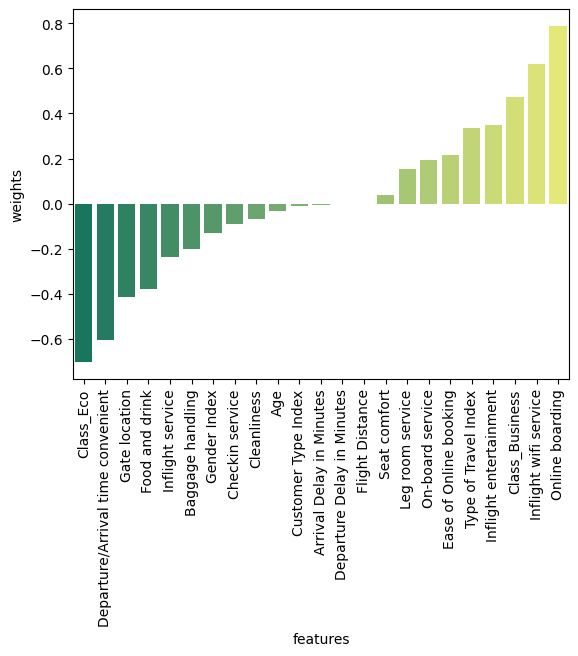

In [186]:
b = sns.barplot(x='features', y='weights', data = importances, palette='summer')
_ = plt.setp(b.get_xticklabels(), rotation=90)